# Analyzing Driving Violation Records

The purpose of this project is to analyze the driving violation records in Rhode Island, USA. <p>
The dataset consists of 91740 driving violation records for 6 districts that were recorded from 2005 until 2015. <p>
The dataset is downloaded from the <a href="https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv">DataCamp</a>. </p>

# Import Library

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import dataset

In [96]:
police = pd.read_csv('./datasets/police.csv')
police.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


# Data Inspection

### a. Null data inspection

In [66]:
police.isna().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

<code>county_name</code> only contain Null value <p>
<code>state</code> only contain one value <p>
<code>search_type</code> majority is Null because <code>search_type</code> will not Null if <code>search_conducted</code> = True. <code>search_conducted</code> = True if it's necessary to conduct search


### b. Datatype inspection

In [67]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

<code>is_arrested</code> dtype is object, it should be bool.

# Data Cleaning

### a. Drop column
all of <code>county_name</code> column is null and state column only have 1 value for all row. 

In [68]:
police.drop(['county_name', 'state'], axis= 1, inplace= True)
police.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


### b. Drop NaN value subsets to driver_gender
<code>driver_gender</code> is important columns for further analysis and it's only small percentage that have Null value. Drop every row with <code>drive_gender</code> is Null/NaN

In [69]:
police.dropna(subset= ['driver_gender'], axis= 0, inplace= True)
police.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

### c. Datatype cleaning
<code>is_arrested</code> columns datatype is object but the value is bool. Change <code>is_arrested</code> columns datatype into bool.

In [70]:
police.is_arrested = police.is_arrested.astype('bool')
police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  bool  
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(3), object(10)
memory usage: 7.5+ MB


In [71]:
police.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


### d. Merging date and time columns

It is a bit wasteful that <code>stop_date</code> column and <code>stop_time</code> column are separated. Merge <code>stop_date</code> column and <code>stop_time</code> into <code>stop_datetime</code> column and change the data type into datetime

In [72]:
police['stop_datetime'] = police.stop_date.str.cat(police.stop_time, sep= ' ')
police['stop_datetime'] = pd.to_datetime(police['stop_datetime'])
police.drop(['stop_date', 'stop_time'], axis='columns', inplace= True)
police.set_index('stop_datetime', inplace= True)

In [73]:
police.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86536 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   driver_gender       86536 non-null  object
 1   driver_race         86536 non-null  object
 2   violation_raw       86536 non-null  object
 3   violation           86536 non-null  object
 4   search_conducted    86536 non-null  bool  
 5   search_type         3307 non-null   object
 6   stop_outcome        86536 non-null  object
 7   is_arrested         86536 non-null  bool  
 8   stop_duration       86536 non-null  object
 9   drugs_related_stop  86536 non-null  bool  
 10  district            86536 non-null  object
dtypes: bool(3), object(8)
memory usage: 6.2+ MB


#### Data has been cleaned out and ready for further analysis


# Question & Analysis
- Is gender affecting the number of violations?
- Which violation has the highest number for every gender? 
- Which gender gets the most search_conducted? 
- Drugs related stop and arrest trend
- Which violation that need to be searched and arrested for? Is it related to drugs?
- Which violation has a higher arrest number?
- Which district has the most violations? Is it related to drugs?
- Does time of day affect the violation number?
- How long might you stop for a violation?

### Q1: Is Gender effect to number of violation?

In [74]:
print('Number of Violation per Gender')
display(pd.crosstab(index= police.driver_gender, columns= police.violation, values= police.violation, aggfunc= 'count', margins=True))
print('Percentage of Violation per Gender')
display(pd.crosstab(index= police.driver_gender, columns= police.violation, values= police.violation, aggfunc= 'count', normalize= 'columns'))

Number of Violation per Gender


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,All
driver_gender,,,,,,,
F,2501,3286,707,1056,578,15646,23774
M,8420,12938,3702,2647,2278,32777,62762
All,10921,16224,4409,3703,2856,48423,86536


Percentage of Violation per Gender


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.229008,0.202539,0.160354,0.285174,0.202381,0.323111
M,0.770992,0.797461,0.839646,0.714826,0.797619,0.676889


There are a higher number of driver violations for male drivers than for female drivers. <p>
For every violation, male drivers tend to get more violations than female drivers. <p>
But, there are not enough data to conclude whether gender affects the number of violation

### Q2: Which violation has the highest number for every gender?

In [75]:
police.groupby('driver_gender')['violation'].value_counts()

driver_gender  violation          
F              Speeding               15646
               Moving violation        3286
               Equipment               2501
               Registration/plates     1056
               Other                    707
               Seat belt                578
M              Speeding               32777
               Moving violation       12938
               Equipment               8420
               Other                   3702
               Registration/plates     2647
               Seat belt               2278
Name: violation, dtype: int64

For both gender, speeding is the most frequent violation.  

### Q3: Which gender get most search_conducted? Which violation that need to be searched for?

In [76]:
police.groupby('driver_gender').search_conducted.sum()

driver_gender
F     456
M    2851
Name: search_conducted, dtype: int64

From 86536 of violation record, there only 3307 search conducted (around 3.8%) for the driver with 456 where female driver and 2851 where male driver.

### Q4: Drugs related stop and arrest trend

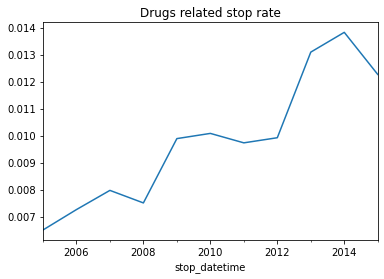

In [77]:
police.drugs_related_stop.resample('Y').mean().plot()
plt.title('Drugs related stop rate')
plt.show()

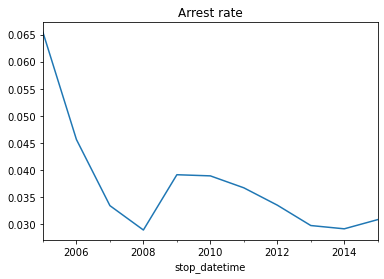

In [78]:
police.is_arrested.resample('Y').mean().plot()
plt.title('Arrest rate')
plt.show()

From the two graph above, drugs related stop are increasing each year and arrest rate is decreasing since 2016.

### Q5: Which violation that need to be searched for? Does it related to drugs?

In [79]:
police.groupby(['violation']).search_conducted.sum().nlargest()

violation
Speeding               1044
Moving violation        925
Equipment               702
Registration/plates     346
Other                   200
Name: search_conducted, dtype: int64

Speeding, moving, and equipment violation is the top reason for conducting search protocol on driver. 

In [80]:
vio1= police.groupby(['violation'])[['search_conducted', 'drugs_related_stop']].sum().sort_values('search_conducted', ascending=False)
vio1['percentage'] = vio1.drugs_related_stop*100/vio1.search_conducted
vio1

,search_conducted,drugs_related_stop,percentage
violation,,,
Speeding,1044,292,27.969349
Moving violation,925,252,27.243243
Equipment,702,195,27.777778
Registration/plates,346,52,15.028902
Other,200,24,12.000000
Seat belt,90,47,52.222222


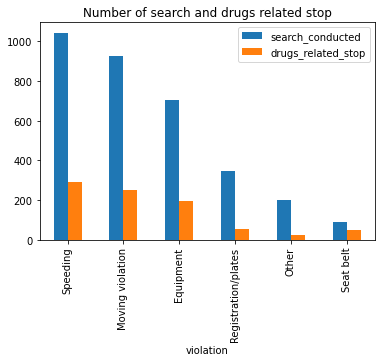

In [81]:
vio1[['search_conducted', 'drugs_related_stop']].plot.bar()
plt.title('Number of search and drugs related stop')
plt.show()

In [82]:
print('number of search conducted:',police[police.search_conducted].shape[0])
print('number of search conducted and drugs related stop:',police[police.search_conducted & police.drugs_related_stop].shape[0])
print('number of drugs related stop:',police[police.drugs_related_stop].shape[0])

number of search conducted: 3307
number of search conducted and drugs related stop: 862
number of drugs related stop: 862


Based on this fact, drug-related stops happen only if search protocols are conducted. <p>
For every violation with search protocol conducted, around 26% of them were drug-related stops. Speeding, moving and equipment violation tend to have a higher percentage of drug-related searches.

### Q6: Which violation with higher arrested number?

In [83]:
police.groupby('violation').is_arrested.sum().nlargest(6)

violation
Moving violation       940
Equipment              709
Speeding               663
Other                  351
Registration/plates    340
Seat belt               75
Name: is_arrested, dtype: int64

Moving violation is the violation with highest number of arrested driver.

### Q7: Which district with most violation? Does it related to drugs?

In [84]:
vio_district = police.groupby('district')[['violation']].count()
vio_district[['search_conducted_count','drugs_related_count']] = police.groupby('district')[['search_conducted','drugs_related_stop']].sum()
vio_district['drugs_per_search'] = vio_district['drugs_related_count']*100/vio_district['search_conducted_count']
vio_district['search_conducted_norm'] = vio_district['search_conducted_count']*100/vio_district['search_conducted_count'].sum()
vio_district['drugs_related_norm'] = vio_district['drugs_related_count']*100/vio_district['drugs_related_count'].sum()
vio_district.sort_values('violation', ascending= False)

,violation,search_conducted_count,drugs_related_count,drugs_per_search,search_conducted_norm,drugs_related_norm
district,,,,,,
Zone X4,22503,1222,327,26.759411,36.951920,37.935035
Zone K3,19560,909,253,27.832783,27.487148,29.350348
Zone K2,17662,454,118,25.991189,13.728455,13.689095
Zone X3,16174,407,82,20.147420,12.307227,9.512761
Zone K1,8296,288,77,26.736111,8.708800,8.932715
Zone X1,2341,27,5,18.518519,0.816450,0.580046


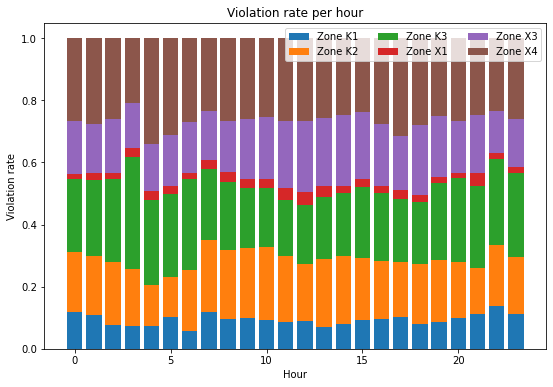

In [85]:
#tes= police.groupby(['district', police.index.hour]).violation.count()

#tes2= pd.DataFrame(tes)
#tes2.unstack()

tes= pd.crosstab(index= police.index.hour, columns= police.district, values= police.violation, aggfunc= 'count', normalize='index')

fig, ax= plt.subplots()
ax.bar(tes.index, tes['Zone K1'], label= 'Zone K1')
ax.bar(tes.index, tes['Zone K2'], label= 'Zone K2', bottom= tes['Zone K1'] )
ax.bar(tes.index, tes['Zone K3'], label= 'Zone K3', bottom= tes['Zone K1']+tes['Zone K2'])
ax.bar(tes.index, tes['Zone X1'], label= 'Zone X1', bottom= tes['Zone K1']+tes['Zone K2']+tes['Zone K3'])
ax.bar(tes.index, tes['Zone X3'], label= 'Zone X3', bottom= tes['Zone K1']+tes['Zone K2']+tes['Zone K3']+tes['Zone X1'])
ax.bar(tes.index, tes['Zone X4'], label= 'Zone X4', bottom= tes['Zone K1']+tes['Zone K2']+tes['Zone K3']+tes['Zone X1']+tes['Zone X3'])
fig.set_size_inches(9,6)
plt.legend(loc='upper right', ncol=3)
plt.title('Violation rate per hour')
plt.ylabel('Violation rate')
plt.xlabel('Hour')
plt.show()

District X4 is the district with the most violations. From the graph above, Zone X4 always has a big portion of violation rate for every hour followed by Zone K3 and Zone K2. <p>
As we know, drug-related stops only happen after conducting search protocol. Zone X4, Zone K3, Zone K2, Zone K1 has the highest percentage of drug-related stops and it is around 25-28%.<p>
From the data, drug-related stops tend to be higher where the zone has a higher violation. Over 80% of drug-related stops happen in Zone X4, Zone K3, and Zone K2 which is the top 3 zone with the highest violation. <p> 
It could be a sign that Zone X4, Zone K3, and Zone K2 have higher crime rates among the other districts and it could be related to drugs. Police need to give extra attention to these 3 districts to give more comfortable living for everyone in that area.

### Q7: Does time of day effect the violation number?

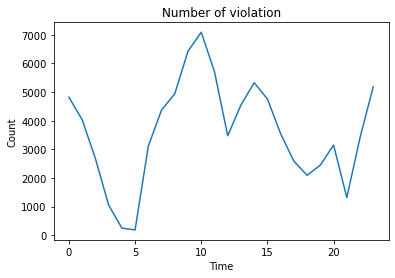

In [86]:
police.groupby(police.index.hour).violation.count().plot()
plt.title('Number of violation')
plt.ylabel('Count')
plt.xlabel('Time')
plt.show()

From the graph above, there are rising violations at dawn and around midnight. <p>
After 6 AM, the violation number is surging. The peak is at 10 PM. Around 57% is speeding violation, 18% is moving violation, 11% is equipment violation. It could happen because that was the rush hour for people to go to work, school, or shopping. <p>
After 9 PM, the violation number is also surging. The peak is at 11 PM. The violation is the same as the peak in the morning with 54% being a speeding violation, 19% being an equipment violation and 18% being a moving violation. At this hour, the rising violation number might be caused by drunk drivers or by criminals who take a chance to conduct their crime.

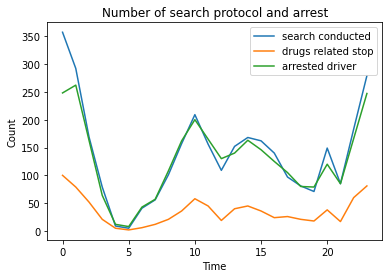

In [87]:
police.groupby(police.index.hour).search_conducted.sum().plot(label= 'search conducted')
police.groupby(police.index.hour).drugs_related_stop.sum().plot(label= 'drugs related stop')
police.groupby(police.index.hour).is_arrested.sum().plot(label= 'arrested driver')
plt.title('Number of search protocol and arrest')
plt.ylabel('Count')
plt.xlabel('Time')
plt.legend()
plt.show()

From the graph above, there are rising numbers at midnight. The number of searches and arrested drivers is rising around midnight and plummeting at dawn. It could be a sign that crime and search protocol are related to the hour. The fact that at midnight, only a few people are outside their house, criminals tend to be more active in conducting crime. <p>
Police should make a move to reduce the rate by conducting more patrols, expanding patrols area, etc.

### Q8: How long might you stopped for a violation?

In [88]:
print('count of violation: \n', police.stop_duration.value_counts())
print('normalize: \n',police.stop_duration.value_counts(normalize=True))

count of violation: 
 0-15 Min     69577
16-30 Min    13740
30+ Min       3219
Name: stop_duration, dtype: int64
normalize: 
 0-15 Min     0.804024
16-30 Min    0.158778
30+ Min      0.037198
Name: stop_duration, dtype: float64


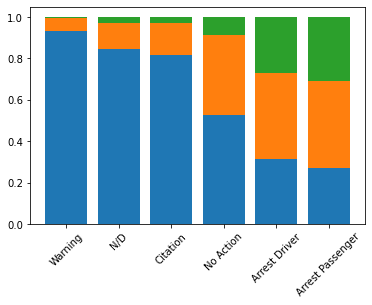

In [89]:
stop = pd.crosstab(index=police.stop_outcome, columns= police.stop_duration, normalize= 'index')
stop.sort_values('0-15 Min', ascending= False,inplace= True)
plt.bar(stop.index, stop['0-15 Min'], label= '0-15 Min')
plt.bar(stop.index, stop['16-30 Min'], bottom= stop['0-15 Min'], label= '16-30 Min')
plt.bar(stop.index, stop['30+ Min'], bottom= stop['0-15 Min']+stop['16-30 Min'], label= '30+ Min')
plt.xticks(rotation=45)
plt.show()

From the data, there are 69577 records (around 80%) for 0-15 minutes stop, 13740 records (around 16%) are 16-30 minutes stop, and only 3219 records (around 4%) of them are 30+ minutes stop. <p>
From the graph, there is a higher rate of 30+ minutes stop whenever there are arrested protocols either for driver or passenger. But, the records count is insignificant if we compare them with citation stop outcome records. So, no conclusion can be made based on the data.  

# Conclusion

There are rising violations after dawn and around midnight. At dawn, the violation could happen because that was the rush hour for people to go to work, school, or shopping. But, around midnight, rising violation numbers could be caused by drunk drivers or by criminals who take a chance to do their crime. Also, based on the data, midnight was the time when the search protocol and the arrested number is the highest. Besides the fact that much of the violation was a speeding violation and could happen because of drunken drivers, midnight was the best time for criminals to conduct a crime. Police should make a move to reduce the rate by conducting more patrols, expanding patrols area, etc. And police should give more attention to higher violation areas with high numbers of drug-related stops like Zone X4, Zone K3, and Zone K2. That area should be the area with the highest crime rate based on the fact that every year, drug-related stops are rising. <p>
The stop is efficient. There are around 80% of stops that take 0-15 minutes and around 16% take 16-30 minutes. Only 4% of them took more than 30 minutes and most of them were when the driver/passenger was arrested.